In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("laptop_price.csv", encoding="latin-1")

In [3]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [4]:
df = df.drop("Product", axis=1)

In [5]:
df = df.join(pd.get_dummies(df.Company))
df = df.drop("Company", axis=1)

In [6]:
df = df.join(pd.get_dummies(df.TypeName))
df = df.drop("TypeName", axis=1)

In [7]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [8]:
df = df.drop("ScreenResolution", axis=1)

In [9]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

In [10]:
df = df.drop("Cpu", axis=1)

In [11]:
df

,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand,CPU Frequency
0,1,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,...,0,0,0,0,1,0,2560,1600,Intel,2.3GHz
1,2,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,...,0,0,0,0,1,0,1440,900,Intel,1.8GHz
2,3,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,...,0,0,0,1,0,0,1920,1080,Intel,2.5GHz
3,4,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,...,0,0,0,0,1,0,2880,1800,Intel,2.7GHz
4,5,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,...,0,0,0,0,1,0,2560,1600,Intel,3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,0,0,...,1,0,0,0,0,0,1920,1080,Intel,2.5GHz
1299,1317,13.3,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,0,0,...,1,0,0,0,0,0,3200,1800,Intel,2.5GHz
1300,1318,14.0,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,...,0,0,0,1,0,0,1366,768,Intel,1.6GHz
1301,1319,15.6,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,...,0,0,0,1,0,0,1366,768,Intel,2.5GHz


In [12]:
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [13]:
df["Ram"] = df["Ram"].str[:-2]

In [14]:
df["Ram"] = df["Ram"].astype("int")
df["CPU Frequency"] = df["CPU Frequency"].astype("float")

In [15]:
df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")

In [16]:
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [17]:
def turn_memory_into_MB(value):
    
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [18]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [19]:
df = df.drop("Memory", axis=1)

In [20]:
df["Weight"] = df["Weight"].str[:-2]

In [21]:
df["Weight"] = df["Weight"].astype("float")

In [22]:
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])

In [23]:
df = df.drop("Gpu", axis=1)

In [24]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [25]:
cpu_categories = pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [26]:
gpu_categories = pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

<AxesSubplot:>

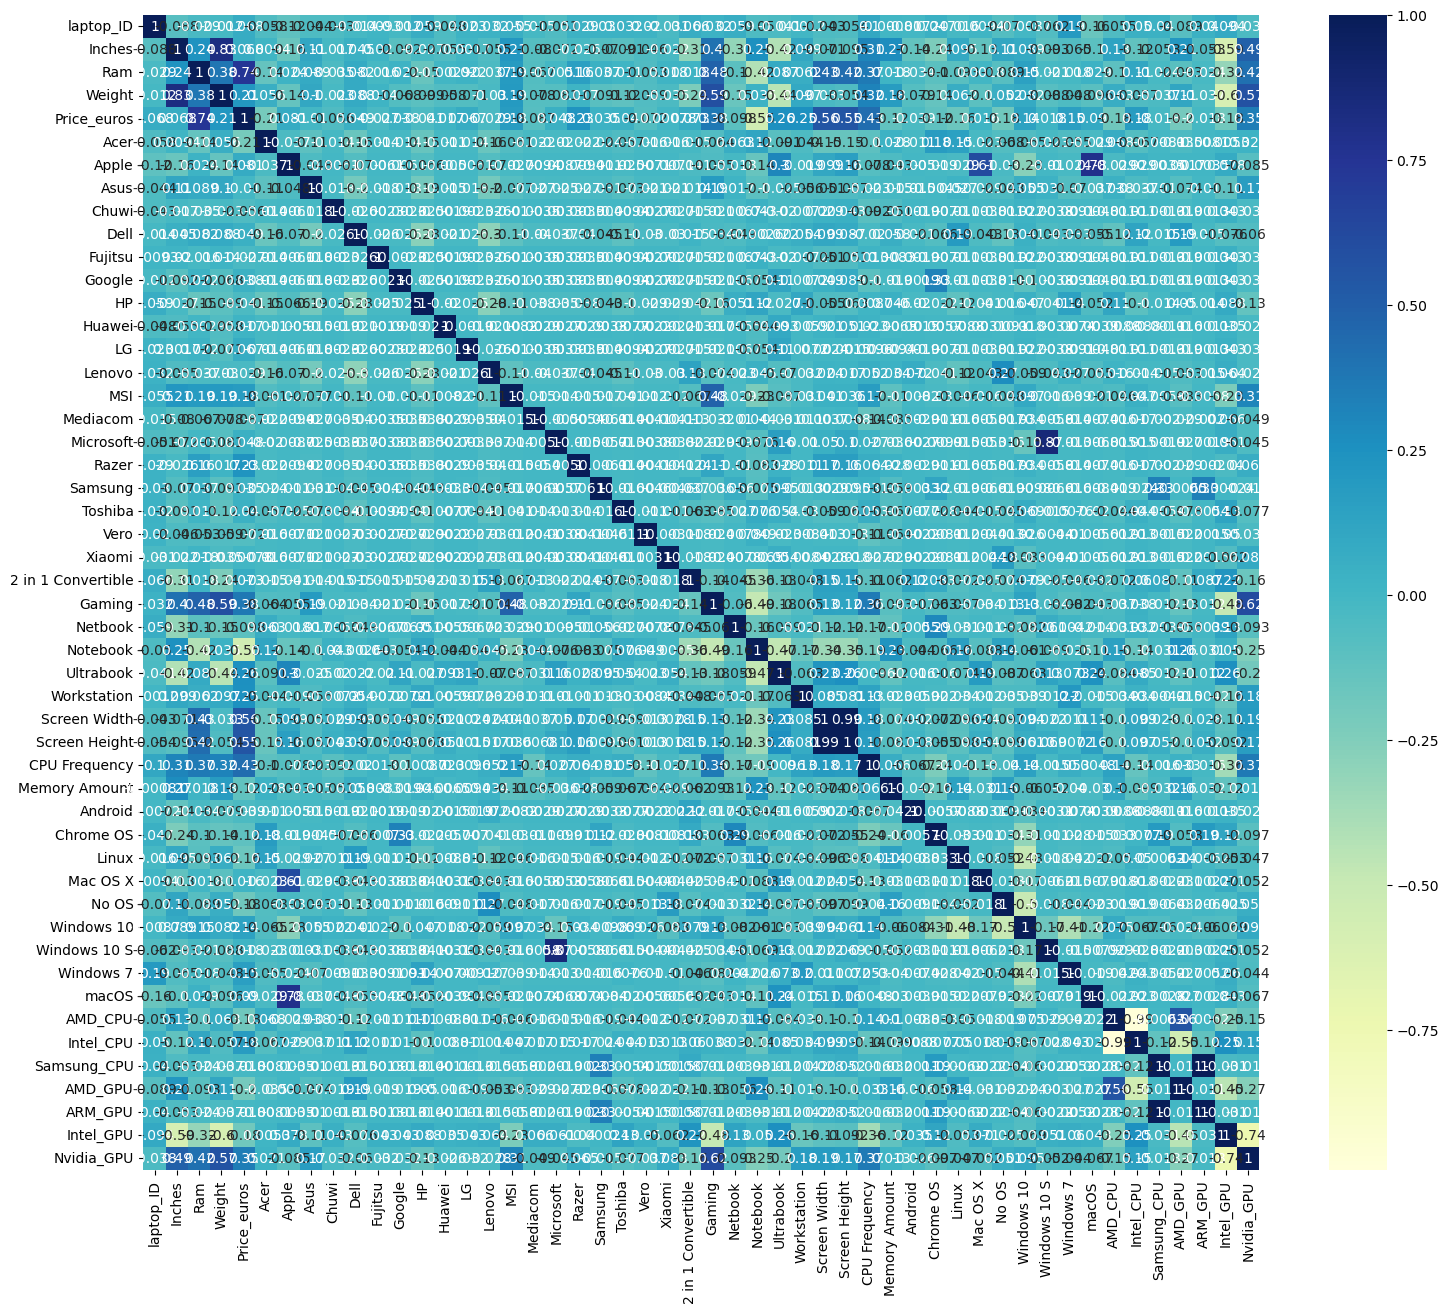

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [28]:
target_correlations = df.corr()['Price_euros'].apply(abs).sort_values()

In [29]:
target_correlations

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI     

In [30]:
selected_features = target_correlations[-21:].index

In [31]:
selected_features = list(selected_features)

In [32]:
selected_features 

['Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'CPU Frequency',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_euros']

In [33]:
limited_df = df[selected_features]

In [34]:
limited_df 

,Windows 7,Linux,No OS,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,...,Workstation,Ultrabook,Nvidia_GPU,Gaming,CPU Frequency,Notebook,Screen Height,Screen Width,Ram,Price_euros
0,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,2.3,0,1600,2560,8,1339.69
1,0,0,0,0,0,1,1,0,0,1.34,...,0,1,0,0,1.8,0,900,1440,8,898.94
2,0,0,1,0,0,1,1,0,0,1.86,...,0,0,0,0,2.5,1,1080,1920,8,575.00
3,0,0,0,0,0,1,0,1,0,1.83,...,0,1,0,0,2.7,0,1800,2880,16,2537.45
4,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,3.1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1,1,0,0,1.80,...,0,0,0,0,2.5,0,1080,1920,4,638.00
1299,0,0,0,0,0,1,1,0,0,1.30,...,0,0,0,0,2.5,0,1800,3200,16,1499.00
1300,0,0,0,0,0,1,1,0,0,1.50,...,0,0,0,0,1.6,1,768,1366,2,229.00
1301,0,0,0,0,0,1,0,1,0,2.19,...,0,0,0,0,2.5,1,768,1366,6,764.00


<AxesSubplot:>

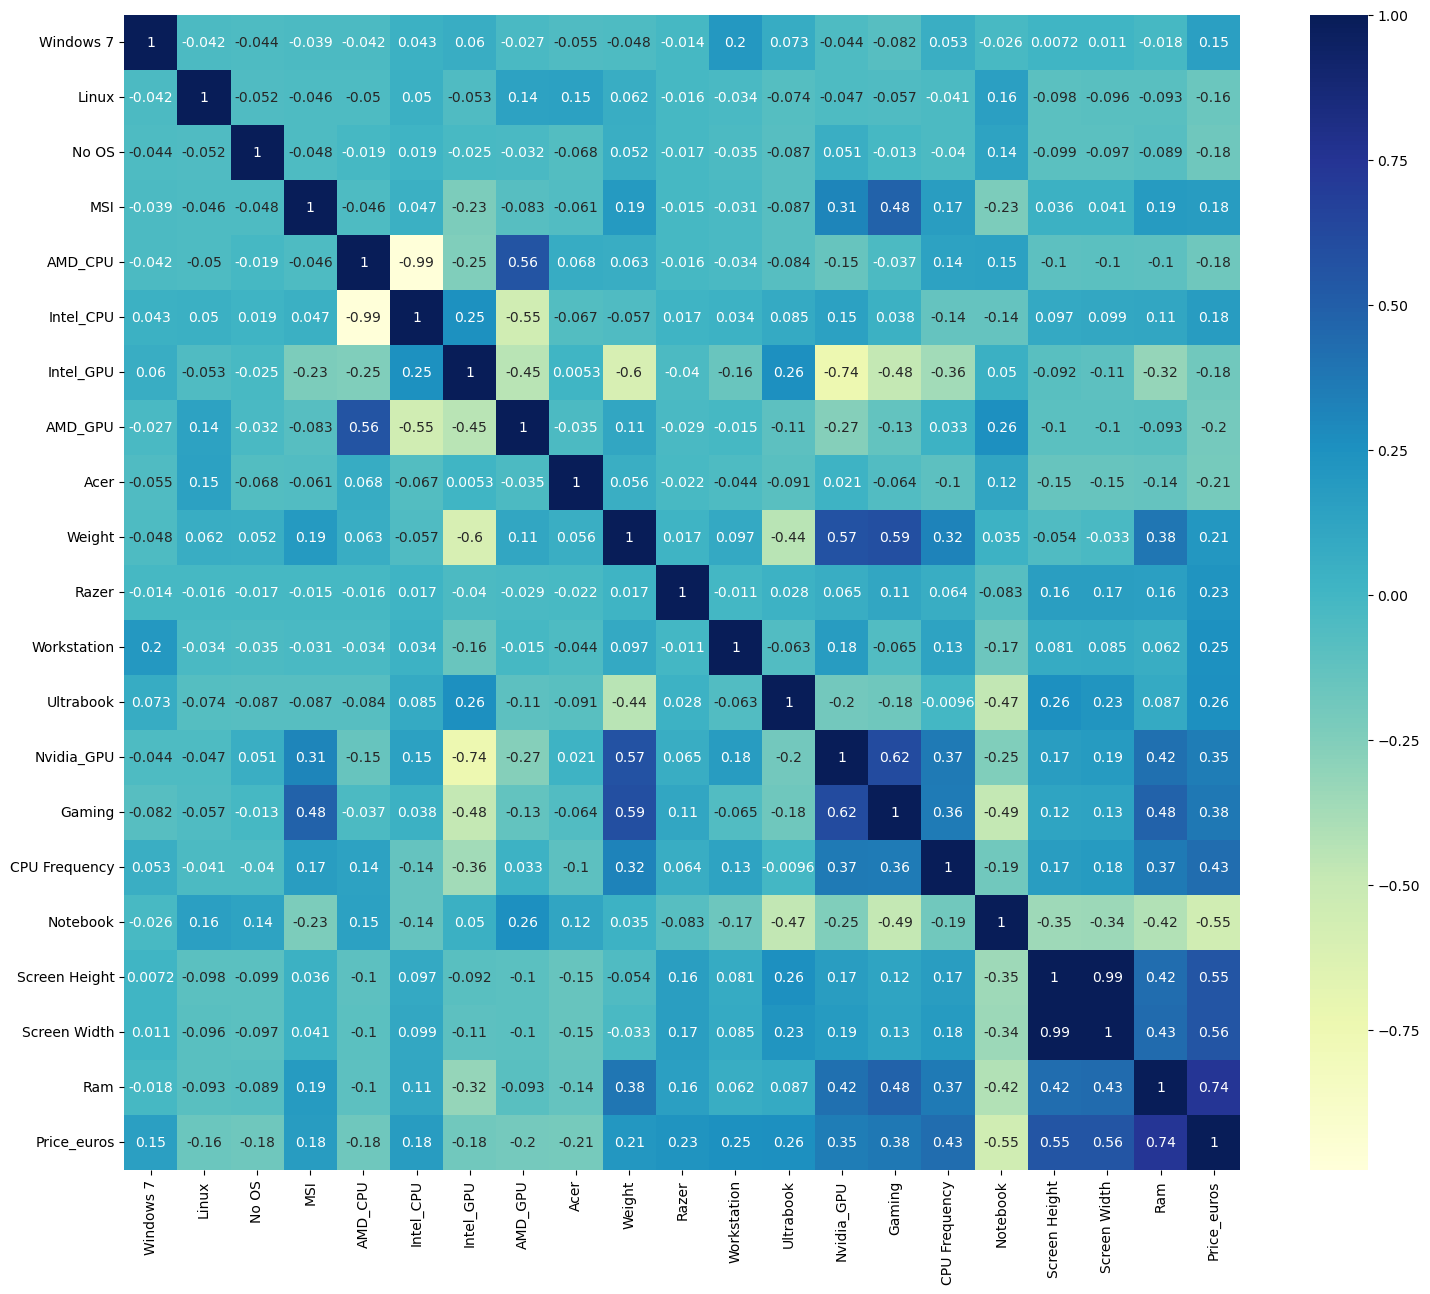

In [35]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [38]:
forest.score(X_test_scaled, y_test)

0.8322192672386654

In [39]:
y_pred = forest.predict(X_test_scaled)

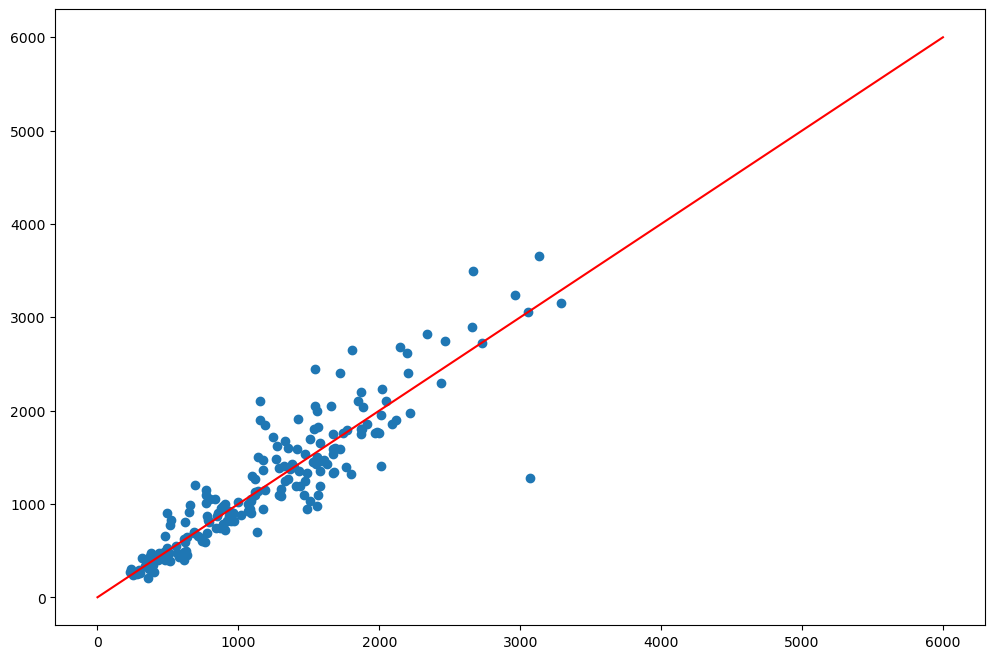

In [40]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")

In [41]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

/Users/meijianming/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
forest.predict(X_new_scaled)

array([905.30914668])

In [43]:
y_test.iloc[0]

726.0